<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#View-Baumgartner_C-N.pb-file" data-toc-modified-id="View-Baumgartner_C-N.pb-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>View Baumgartner_C-N.pb file</a></span></li><li><span><a href="#Train-Benchmarks" data-toc-modified-id="Train-Benchmarks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Benchmarks</a></span><ul class="toc-item"><li><span><a href="#Baumgartner_C-N" data-toc-modified-id="Baumgartner_C-N-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baumgartner_C-N</a></span><ul class="toc-item"><li><span><a href="#Set-up-4-domains" data-toc-modified-id="Set-up-4-domains-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Set up 4 domains</a></span></li><li><span><a href="#Create-Dataset" data-toc-modified-id="Create-Dataset-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Create Dataset</a></span></li><li><span><a href="#train-benchmarks-=-bm" data-toc-modified-id="train-benchmarks-=-bm-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>train benchmarks = bm</a></span></li><li><span><a href="#Save-Benchmarks" data-toc-modified-id="Save-Benchmarks-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Save Benchmarks</a></span></li><li><span><a href="#Load-Benchmarks" data-toc-modified-id="Load-Benchmarks-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Load Benchmarks</a></span></li></ul></li></ul></li><li><span><a href="#Plot-all-results-(Imports,-then-start-here)" data-toc-modified-id="Plot-all-results-(Imports,-then-start-here)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot all results (Imports, then start here)</a></span><ul class="toc-item"><li><span><a href="#define-pretraining-datasets" data-toc-modified-id="define-pretraining-datasets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>define pretraining datasets</a></span></li><li><span><a href="#Load-Benchmarks" data-toc-modified-id="Load-Benchmarks-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Load Benchmarks</a></span></li><li><span><a href="#Produce-graphs" data-toc-modified-id="Produce-graphs-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Produce graphs</a></span><ul class="toc-item"><li><span><a href="#Aniline" data-toc-modified-id="Aniline-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Aniline</a></span></li><li><span><a href="#Benzamide" data-toc-modified-id="Benzamide-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Benzamide</a></span></li><li><span><a href="#phenethylamine" data-toc-modified-id="phenethylamine-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>phenethylamine</a></span></li><li><span><a href="#Morpholine" data-toc-modified-id="Morpholine-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Morpholine</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [1]:
# Import modules
import ord_schema
from ord_schema import message_helpers, validations
from ord_schema.proto import dataset_pb2

import math
import pandas as pd
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
import os
#import wget

from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn import model_selection, metrics
from glob import glob
from IPython.display import clear_output

#summit
import summit
from summit.benchmarks import ExperimentalEmulator
from summit.domain import *
from summit.utils.dataset import DataSet
from summit import Runner
from summit.strategies import Random, MultitoSingleObjective, STBO, MTBO
# from summit.strategies import SOBO
from summit.benchmarks import SnarBenchmark
import pkg_resources
import pathlib
import random
from summit.strategies import LHS, MTBO


# Create files

In [2]:
# Use baumgartner_C-N_etl to create an ORD dataset from the raw data
# Now we can load the dataset

# View Baumgartner_C-N.pb file

In [3]:
case1 = 'data/baumgartner_C-N/baumgartner_cn_case_1.pb'

# Load Dataset message
data = message_helpers.load_message(case1, dataset_pb2.Dataset)

# Ensure dataset validates
valid_output = validations.validate_message(data)

# Convert dataset to pandas dataframe
df = message_helpers.messages_to_dataframe(data.reactions, 
                                           drop_constant_columns=True)

# View dataframe
# df

In [4]:
# merge all dfs
case1 = 'data/baumgartner_C-N/baumgartner_cn_case_1.pb'
case2 = 'data/baumgartner_C-N/baumgartner_cn_case_2.pb'
case3 = 'data/baumgartner_C-N/baumgartner_cn_case_3.pb'
case4 = 'data/baumgartner_C-N/baumgartner_cn_case_4.pb'

# Load Dataset message
data1 = message_helpers.load_message(case1, dataset_pb2.Dataset)
data2 = message_helpers.load_message(case2, dataset_pb2.Dataset)
data3 = message_helpers.load_message(case3, dataset_pb2.Dataset)
data4 = message_helpers.load_message(case4, dataset_pb2.Dataset)

# Ensure dataset validates
valid_output = validations.validate_message(data1)
valid_output = validations.validate_message(data2)
valid_output = validations.validate_message(data3)
valid_output = validations.validate_message(data4)

# Convert dataset to pandas dataframe
df1 = message_helpers.messages_to_dataframe(data1.reactions)
df2 = message_helpers.messages_to_dataframe(data2.reactions)
df3 = message_helpers.messages_to_dataframe(data3.reactions)
df4 = message_helpers.messages_to_dataframe(data4.reactions)

# Merge all dataframes
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [5]:
df.columns

Index(['identifiers[0].type', 'identifiers[0].value',
       'inputs["Electrophile"].components[0].identifiers[0].type',
       'inputs["Electrophile"].components[0].identifiers[0].value',
       'inputs["Electrophile"].components[0].identifiers[1].type',
       'inputs["Electrophile"].components[0].identifiers[1].value',
       'inputs["Electrophile"].components[0].amount.moles.value',
       'inputs["Electrophile"].components[0].amount.moles.units',
       'inputs["Electrophile"].components[0].reaction_role',
       'inputs["Electrophile"].components[0].is_limiting',
       ...
       'outcomes[0].analyses["LCMS"].type', 'provenance.doi',
       'provenance.publication_url', 'provenance.record_created.time.value',
       'provenance.record_created.person.username',
       'provenance.record_created.person.name',
       'provenance.record_created.person.orcid',
       'provenance.record_created.person.organization',
       'provenance.record_created.person.email', 'reaction_id'],
    

In [6]:
max(df['outcomes[0].products[0].measurements[0].percentage.value'])

103.16002655029297

In [7]:
# Check for NaN values
print(f'number of NaN values: {df.isnull().sum().sum()}')

# Show column counts
df.info()

number of NaN values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Columns: 110 entries, identifiers[0].type to reaction_id
dtypes: bool(4), float64(13), int64(7), object(86)
memory usage: 273.0+ KB


In [8]:
# Create new dataframe containing only columns to be used in modeling
model_cols = ['inputs["Catalyst"].components[0].identifiers[0].value',
              'inputs["Base"].components[0].identifiers[0].value',
              'inputs["Solvent"].components[0].identifiers[0].value',
              'inputs["Nucleophile"].components[0].identifiers[0].value',
              'outcomes[0].reaction_time.value',
              'conditions.temperature.setpoint.value',
              'outcomes[0].products[0].measurements[0].percentage.value',
             ]
df = df[model_cols]
#df

# Train Benchmarks
https://gosummit.readthedocs.io/en/latest/tutorials/new_benchmarks.html

## Baumgartner_C-N

### Set up 4 domains

We are going to manipulate:
- Ligand (precatalyst is always the same)
- Base
- Solvent
- Temperature
- Reaction time

We will create 4 domains, one for each nucleophile

Objective: Maximise yield

Decision variables

The precatalyst is always the same: https://www.strem.com/catalog/v/46-0308/51/palladium_225931-80-6

The additive is always the same: 4-Chlorotoluene

The ligand changes

In [9]:
# aniline_domain = Domain()
# benzamide_domain = Domain()
# phenethylamine_domain = Domain()
# morpholine_domain = Domain()

# domain_list = [aniline_domain,benzamide_domain,phenethylamine_domain,morpholine_domain]

domain = Domain()

# Decision variables
des_1 = "Catalyst"
domain += CategoricalVariable(
    name='inputs["Catalyst"].components[0].identifiers[0].value',
    description=des_1,
    levels=[
        'cycloPd tBuXPhos 4-Chlorotoluene', 
         'cycloPd EPhos 4-Chlorotoluene', 
         'cycloPd AlPhos 4-Chlorotoluene', 
         'cycloPd tBuBrettPhos 4-Chlorotoluene',
    ],
)


# Decision variables
des_2 = "Base"
domain += CategoricalVariable(
    name='inputs["Base"].components[0].identifiers[0].value',
    description=des_2,
    levels=[
        "TEA",
        "Triethylamine",
        "TMG",
        "BTMG",
        "DBU",
        "MTBD",
        "BTTP",
        "P2Et",
    ],
)

# Decision variables
des_3 = "Solvent"
domain += CategoricalVariable(
    name='inputs["Solvent"].components[0].identifiers[0].value',
    description=des_3,
    levels=[
        "2-MeTHF",
        "DMSO",
    ],
)

des_4 = "Residence time in seconds (s)"
domain += ContinuousVariable(name="outcomes[0].reaction_time.value", description=des_4, bounds=[60, 6000])

des_5 = "Reactor temperature in degrees Celsius (ºC)"
domain += ContinuousVariable(
    name="conditions.temperature.setpoint.value", description=des_5, bounds=[30, 110]
)


# Objectives
des_6 = "Yield"
domain += ContinuousVariable(
    name="outcomes[0].products[0].measurements[0].percentage.value",
    description=des_6,
    bounds=[0, 105],
    is_objective=True,
    maximize=True,
)

In [10]:
domain

Name,Type,Description,Values
"inputs[""Catalyst""].components[0].identifiers[0].value","categorical, input",Catalyst,4 levels
"inputs[""Base""].components[0].identifiers[0].value","categorical, input",Base,8 levels
"inputs[""Solvent""].components[0].identifiers[0].value","categorical, input",Solvent,2 levels
outcomes[0].reaction_time.value,"continuous, input",Residence time in seconds (s),"[60,6000]"
conditions.temperature.setpoint.value,"continuous, input",Reactor temperature in degrees Celsius (ºC),"[30,110]"
outcomes[0].products[0].measurements[0].percentage.value,"continuous, maximize objective",Yield,"[0,105]"


### Create Dataset

We need 4 datasets, one for each nucleophile

In [11]:
aniline_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Aniline']
benzamide_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Benzamide']
phenethylamine_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Phenethylamine']
morpholine_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Morpholine']

#remove nucleophile row
del aniline_df['inputs["Nucleophile"].components[0].identifiers[0].value']
del benzamide_df['inputs["Nucleophile"].components[0].identifiers[0].value']
del phenethylamine_df['inputs["Nucleophile"].components[0].identifiers[0].value']
del morpholine_df['inputs["Nucleophile"].components[0].identifiers[0].value']

In [12]:
# shuffle df
aniline_df = aniline_df.sample(frac=1)
aniline_ds = DataSet.from_df(aniline_df)

benzamide_df = aniline_df.sample(frac=1)
benzamide_ds = DataSet.from_df(benzamide_df)

phenethylamine_df = aniline_df.sample(frac=1)
phenethylamine_ds = DataSet.from_df(phenethylamine_df)

morpholine_df = aniline_df.sample(frac=1)
morpholine_ds = DataSet.from_df(morpholine_df)


### train benchmarks = bm

In [13]:
aniline_bm = ExperimentalEmulator(model_name='aniline_bm', domain=domain, dataset=aniline_ds)
aniline_bm.train(max_epochs=400, cv_fold=2, test_size=0.1, verbose=0)

{'fit_time': array([0.84852314, 0.73345709, 0.79746819, 0.72382593, 0.70997   ]),
 'score_time': array([0.00360203, 0.00332499, 0.00334287, 0.00332999, 0.00344801]),
 'val_r2': array([0.80316376, 0.86379644, 0.8782327 , 0.92133065, 0.89748681]),
 'val_neg_root_mean_squared_error': array([-17.99630165, -15.51055527, -13.94369602, -12.26808929,
        -13.26236248])}

In [14]:
benzamide_bm = ExperimentalEmulator(model_name='benzamide_bm', domain=domain, dataset=benzamide_ds)
benzamide_bm.train(max_epochs=400, cv_fold=2, test_size=0.1, verbose=0)

{'fit_time': array([0.69560289, 0.69993281, 0.75858426, 0.72101927, 0.78117681]),
 'score_time': array([0.00321817, 0.0034461 , 0.0034287 , 0.00360179, 0.00323725]),
 'val_r2': array([0.92450931, 0.92382875, 0.78293359, 0.85180645, 0.67774905]),
 'val_neg_root_mean_squared_error': array([-11.05528069, -11.09072304, -19.52469635, -16.32777405,
        -20.98633194])}

In [15]:
phenethylamine_bm = ExperimentalEmulator(model_name='phenethylamine_bm', domain=domain, dataset=phenethylamine_ds)
phenethylamine_bm.train(max_epochs=400, cv_fold=2, test_size=0.1, verbose=0)

{'fit_time': array([0.70491004, 0.75879717, 0.71103525, 0.73940682, 0.72321701]),
 'score_time': array([0.00332594, 0.00326991, 0.0033679 , 0.00326204, 0.00329113]),
 'val_r2': array([0.78157104, 0.74483884, 0.90521512, 0.95591741, 0.8890564 ]),
 'val_neg_root_mean_squared_error': array([-20.28895569, -19.76554298, -11.62807655,  -9.5408783 ,
        -13.07651329])}

In [16]:
morpholine_bm = ExperimentalEmulator(model_name='morpholine_bm', domain=domain, dataset=morpholine_ds)
morpholine_bm.train(max_epochs=400, cv_fold=2, test_size=0.1, verbose=0)

{'fit_time': array([0.71379995, 0.72550797, 0.69909692, 0.73069882, 0.75828886]),
 'score_time': array([0.00353909, 0.00334501, 0.0032711 , 0.00328708, 0.00324607]),
 'val_r2': array([0.88806734, 0.89286904, 0.84964252, 0.86203545, 0.8056243 ]),
 'val_neg_root_mean_squared_error': array([-15.32025337, -13.91064644, -14.96138382, -14.44970989,
        -18.56318665])}

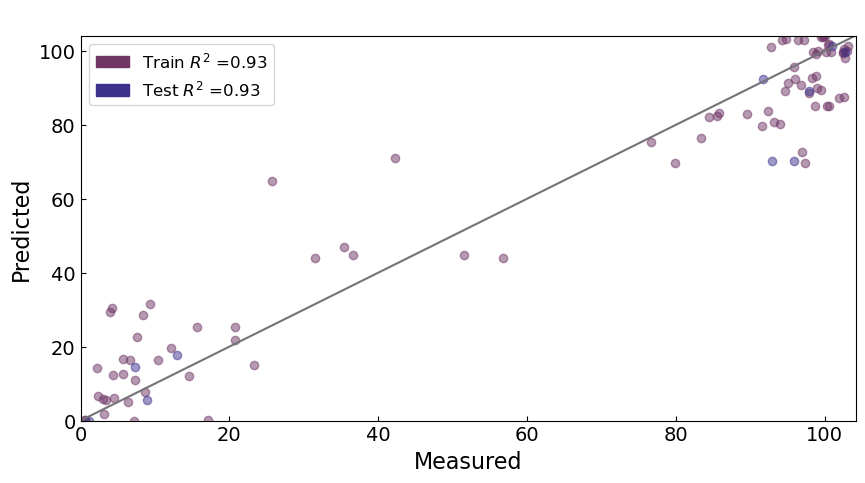

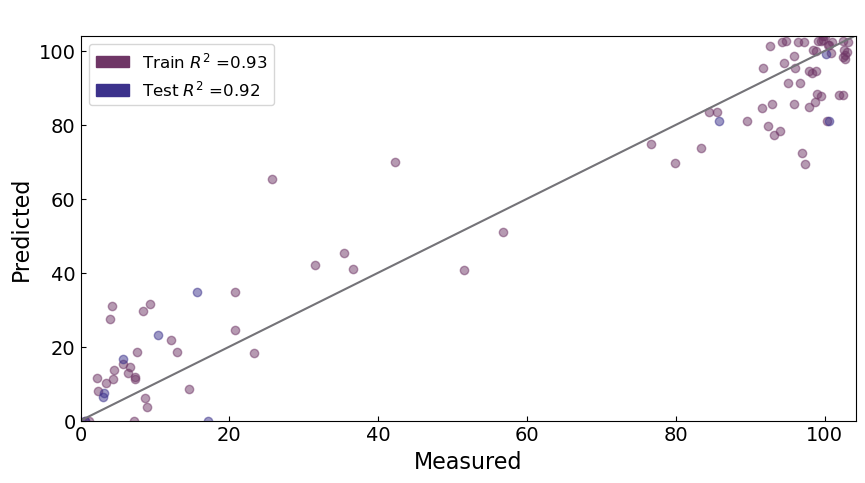

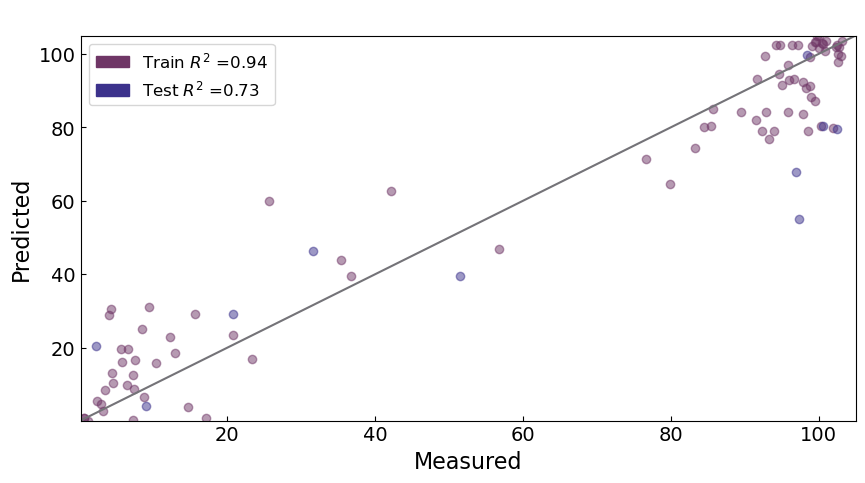

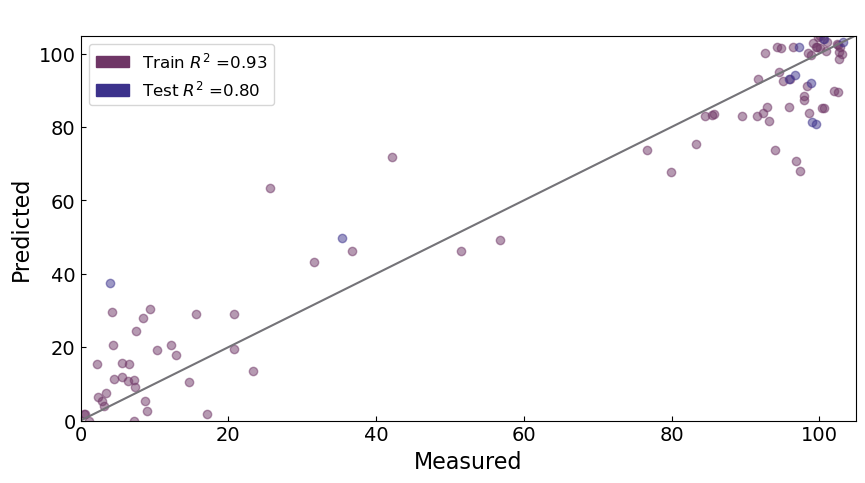

In [17]:
# Define a function to modify the plot settings
def modify_plot_settings(ax):
    ax.set_title(" ", fontsize=16)  # Set title and font size
    ax.set_xlabel("Measured", fontsize=16)  # Set x-axis label and font size
    ax.set_ylabel("Predicted", fontsize=16)  # Set y-axis label and font size
    ax.tick_params(axis="both", which="both", labelsize=14)  # Set tick font size

# Parity plots
fig, axes = aniline_bm.parity_plot(include_test=True)
for ax in axes:
    modify_plot_settings(ax)

# Save the figure with modified settings
plt.savefig('figures/baumgartner_CN/aniline_parity_plot.png', dpi=600, bbox_inches='tight')

# Repeat the same process for other plots
fig, axes = benzamide_bm.parity_plot(include_test=True)
for ax in axes:
    modify_plot_settings(ax)
plt.savefig('figures/baumgartner_CN/benzamide_parity_plot.png', dpi=600, bbox_inches='tight')

fig, axes = phenethylamine_bm.parity_plot(include_test=True)
for ax in axes:
    modify_plot_settings(ax)
plt.savefig('figures/baumgartner_CN/phenethylamine_parity_plot.png', dpi=600, bbox_inches='tight')

fig, axes = morpholine_bm.parity_plot(include_test=True)
for ax in axes:
    modify_plot_settings(ax)
plt.savefig('figures/baumgartner_CN/morpholine_parity_plot.png', dpi=600, bbox_inches='tight')


In [18]:
# Set new titles for each subplot individually
for i, ax in enumerate(axes):
    ax.set_title("My New Title {}".format(i + 1))


In [19]:
#Test out a set of conditions on the benchmark
conditions = [["cycloPd EPhos 4-Chlorotoluene", 'BTMG', '2-MeTHF', 1324, 65.0]]
conditions = DataSet(conditions, columns=[v.name for v in domain.input_variables])
morpholine_bm.run_experiments(conditions)

,"inputs[""Catalyst""].components[0].identifiers[0].value","inputs[""Base""].components[0].identifiers[0].value","inputs[""Solvent""].components[0].identifiers[0].value",outcomes[0].reaction_time.value,conditions.temperature.setpoint.value,outcomes[0].products[0].measurements[0].percentage.value,computation_t,experiment_t,strategy
0,cycloPd EPhos 4-Chlorotoluene,BTMG,2-MeTHF,1324,65.0,96.278282,0.0,0.016083,NaN


### Save Benchmarks

In [20]:
# Save it
aniline_bm.save(save_dir="data/baumgartner_C-N/aniline_emulator")

benzamide_bm.save(save_dir="data/baumgartner_C-N/benzamide_emulator")

phenethylamine_bm.save(save_dir="data/baumgartner_C-N/phenethylamine_emulator")

morpholine_bm.save(save_dir="data/baumgartner_C-N/morpholine_emulator")

### Load Benchmarks

In [21]:
# Load them
aniline_bm = ExperimentalEmulator.load(model_name="aniline_bm", save_dir="data/baumgartner_C-N/aniline_emulator")
benzamide_bm = ExperimentalEmulator.load(model_name="benzamide_bm", save_dir="data/baumgartner_C-N/benzamide_emulator")
phenethylamine_bm = ExperimentalEmulator.load(model_name="phenethylamine_bm", save_dir="data/baumgartner_C-N/phenethylamine_emulator")
morpholine_bm = ExperimentalEmulator.load(model_name="morpholine_bm", save_dir="data/baumgartner_C-N/morpholine_emulator")

In [22]:
#add meta column

aniline_ds[("task", "METADATA")] = 0
benzamide_ds[("task", "METADATA")] = 0
phenethylamine_ds[("task", "METADATA")] = 0
morpholine_ds[("task", "METADATA")] = 0

# Plot all results (Imports, then start here) 

In [28]:
class Nucleophile():
    
    def __init__(self, nucleophile, exp, N_REPEATS=10, MAX_ITERATIONS=20):
        self.nucleophile = nucleophile #string with the name of the nucleophile
        self.exp = exp
        self.N_REPEATS = N_REPEATS
        self.MAX_ITERATIONS = MAX_ITERATIONS
        
    def run_random(self, random_state=np.random.RandomState(3)):
        self.exp.reset()
        strategy = Random(self.exp.domain, 
                        random_state=random_state)
        r = summit.Runner(strategy=strategy, 
                          experiment=self.exp, 
                          max_iterations=self.MAX_ITERATIONS)
        r.run()
        return r

    def run_stbo(self, categorical_method="one-hot"):
        self.exp.reset()
        strategy = STBO(self.exp.domain, 
                        categorical_method=categorical_method)
        r = summit.Runner(strategy=strategy, 
                          experiment=self.exp, 
                          max_iterations=self.MAX_ITERATIONS)
        r.run()
        return r

    def run_mtbo(self, pt_data, task=1):
            self.exp.reset()
            strategy = MTBO(self.exp.domain, 
                            pretraining_data=pt_data,
                            categorical_method="one-hot",
                            task=task)
            r = summit.Runner(strategy=strategy,
                              experiment=self.exp, 
                              max_iterations=self.MAX_ITERATIONS)
            r.run()
            return r


    def make_average_plot(self, results: [summit.Runner], ax, label=None, color=None):
        objective = results[0].experiment.domain.output_variables[0].name
        yields = [r.experiment.data[objective] for r in results]
        yields = np.array(yields)
        mean_yield = np.mean(yields, axis=0)
        std_yield = np.std(yields, axis=0)
        x = np.arange(0, len(mean_yield), 1).astype(int)
        ax.plot(x, mean_yield, label=label, linewidth=2, color=color)
        ax.fill_between(x, mean_yield-std_yield, mean_yield+std_yield, alpha=0.1, color=color)

    def plot_figure(self, pt_name):
        #pt_name: name of nucleophile used for pretraining
        
        random_results = [summit.Runner.load(f"data/baumgartner_C-N/results/{self.nucleophile}_random_{i}.json") for i in range(10)]
        stbo_results = [summit.Runner.load(f"data/baumgartner_C-N/results/{self.nucleophile}_STBO_{i}.json") for i in range(10)]
        mtbo10_results = [summit.Runner.load(f"data/baumgartner_C-N/results/{self.nucleophile}_{pt_name}_10_MTBO_{i}.json") for i in range(10)]
        mtbo50_results = [summit.Runner.load(f"data/baumgartner_C-N/results/{self.nucleophile}_{pt_name}_50_MTBO_{i}.json") for i in range(10)]
        
        fig, ax = self.make_comparison_plot(
            # dict(results=random_results, label="Random", color = 'yellow'),
            dict(results=stbo_results, label="STBO", color = 'blue'),
            dict(results=mtbo10_results, label="MTBO, n=10", color = 'orange'),
            dict(results=mtbo50_results,label="MTBO, n=50", color = 'green'),
            )
        # fig.suptitle(self.nucleophile+' trained on '+ pt_name, fontsize=16)
        fig.savefig(f"figures/baumgartner_CN/{self.nucleophile}_pt_on_{pt_name}.png", bbox_inches='tight', dpi=600)
        
    def random_strategy(self):
        #Random
        for i in range(self.N_REPEATS):
            print(f"Repeat {i}")
            result = self.run_random()
            result.save(f"data/baumgartner_C-N/results/{self.nucleophile}_random_{i}.json")
            clear_output(wait=True)
            
    def STBO_strategy(self):
        #Singletask Bayesian Optimization
        for i in range(self.N_REPEATS):
            print(f"Repeat {i}")
            result = self.run_stbo()
            result.save(f"data/baumgartner_C-N/results/{self.nucleophile}_STBO_{i}.json")
            clear_output(wait=True)
            
    def MTBO_strategy(self, pt, pt_name, pt_samples):
    #pt = pretraining dataset
    #pt_name = string of the nucleophile used for pretraining
    #pt_samples = number of pretraining datapoints from pt, either 10 or 50
    #Multi-Task Bayesian Optimization
        for i in range(self.N_REPEATS):
            #randomly select pt_samples sample indices for pretraining
            random_indices = random.sample(range(0, len(pt)), pt_samples)
            random_samples = pt.loc[random_indices]

            
            print(f"Repeat {i}")
            
            #To avoid NotPSDError (which occurs when the model picks points too close to each other)
            # simply run the model again. It's unlikely to fail twice in a row
            try:
                result = self.run_mtbo(random_samples)
            except RuntimeError:
                try:
                    result = self.run_mtbo(random_samples)
                except RuntimeError:
                    result = self.run_mtbo(random_samples)
                

            result.save(f"data/baumgartner_C-N/results/{self.nucleophile}_{pt_name}_{pt_samples}_MTBO_{i}.json")
            clear_output(wait=True)


    def make_comparison_plot(self, *args):
        fig, ax = plt.subplots(1)
        for arg in args:
            self.make_average_plot(arg['results'], ax, label=arg["label"], color=arg["color"])
        fontdict = fontdict={"size":16}
        ax.legend(loc = "lower right", prop=fontdict)
        ax.set_xlim(0,20)
        ax.set_xticks(np.arange(0, 20, 2).astype(int))
        ax.set_ylabel('Yield', fontdict=fontdict)
        ax.set_xlabel('Reactions', fontdict=fontdict)
        ax.tick_params(direction='in', labelsize=14)
        return fig, ax 
    

## define pretraining datasets

In [29]:
# df defined earlier
# Create new dataframe containing only columns to be used in modeling
model_cols = ['inputs["Catalyst"].components[0].identifiers[0].value',
              'inputs["Base"].components[0].identifiers[0].value',
              'inputs["Solvent"].components[0].identifiers[0].value',
              'inputs["Nucleophile"].components[0].identifiers[0].value',
              'outcomes[0].reaction_time.value',
              'conditions.temperature.setpoint.value',
              'outcomes[0].products[0].measurements[0].percentage.value',
             ]
df = df[model_cols]

aniline_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Aniline']
benzamide_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Benzamide']
phenethylamine_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Phenethylamine']
morpholine_df = df[df['inputs["Nucleophile"].components[0].identifiers[0].value'] == 'Morpholine']

aniline_df.reset_index(inplace=True)
benzamide_df.reset_index(inplace=True)
phenethylamine_df.reset_index(inplace=True)
morpholine_df.reset_index(inplace=True)


aniline_ds = DataSet.from_df(aniline_df)
benzamide_ds = DataSet.from_df(benzamide_df)
phenethylamine_ds = DataSet.from_df(phenethylamine_df)
morpholine_ds = DataSet.from_df(morpholine_df)

#add meta column
aniline_ds[("task", "METADATA")] = 0
benzamide_ds[("task", "METADATA")] = 0
phenethylamine_ds[("task", "METADATA")] = 0
morpholine_ds[("task", "METADATA")] = 0


## Load Benchmarks

In [30]:
# Load them
aniline_bm = ExperimentalEmulator.load(model_name="aniline_bm", save_dir="data/baumgartner_C-N/aniline_emulator")
benzamide_bm = ExperimentalEmulator.load(model_name="benzamide_bm", save_dir="data/baumgartner_C-N/benzamide_emulator")
phenethylamine_bm = ExperimentalEmulator.load(model_name="phenethylamine_bm", save_dir="data/baumgartner_C-N/phenethylamine_emulator")
morpholine_bm = ExperimentalEmulator.load(model_name="morpholine_bm", save_dir="data/baumgartner_C-N/morpholine_emulator")

## Produce graphs

### Aniline

In [31]:
aniline = Nucleophile('aniline', aniline_bm)

In [27]:
aniline.random_strategy()

Repeat 9


In [28]:
aniline.STBO_strategy()

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  war

In [29]:
aniline.MTBO_strategy(benzamide_ds, 'benzamide', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [30]:
aniline.MTBO_strategy(benzamide_ds, 'benzamide', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

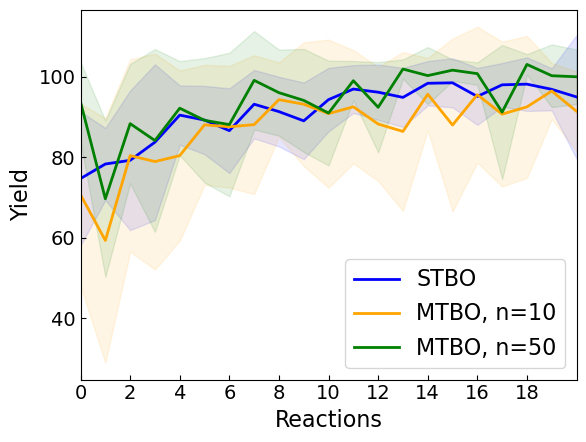

In [32]:
aniline.plot_figure('benzamide')

In [32]:
aniline.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [33]:
aniline.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

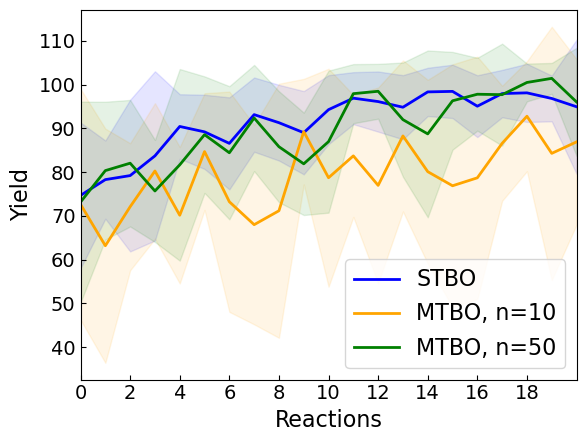

In [33]:
aniline.plot_figure('phenethylamine')

In [35]:
aniline.MTBO_strategy(morpholine_ds, 'morpholine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [36]:
aniline.MTBO_strategy(morpholine_ds, 'morpholine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

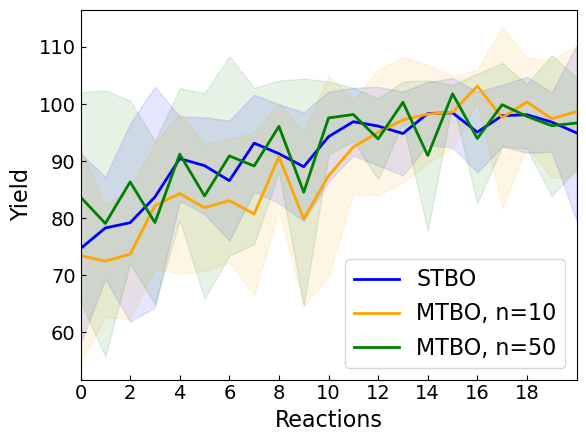

In [34]:
aniline.plot_figure('morpholine')

### Benzamide

In [35]:
benzamide = Nucleophile('benzamide', benzamide_bm)

In [39]:
benzamide.random_strategy()
benzamide.STBO_strategy()

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  war

In [40]:
benzamide.MTBO_strategy(aniline_ds, 'aniline', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [41]:
benzamide.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [42]:
benzamide.MTBO_strategy(morpholine_ds, 'morpholine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [43]:
benzamide.MTBO_strategy(aniline_ds, 'aniline', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [44]:
benzamide.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [45]:
benzamide.MTBO_strategy(morpholine_ds, 'morpholine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

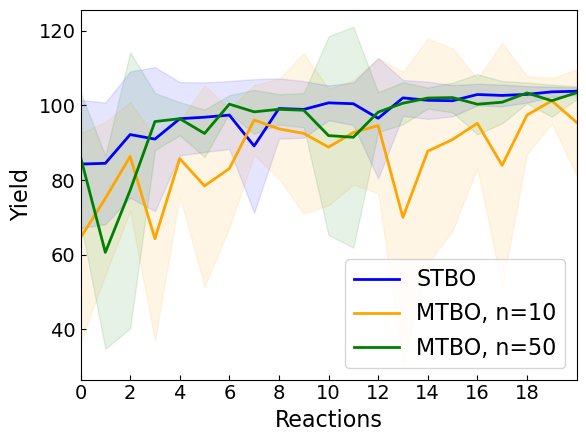

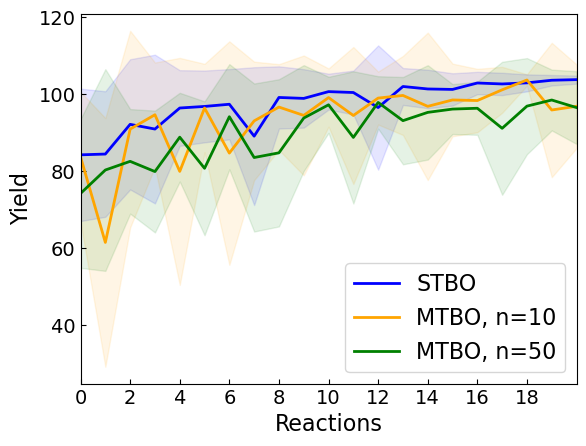

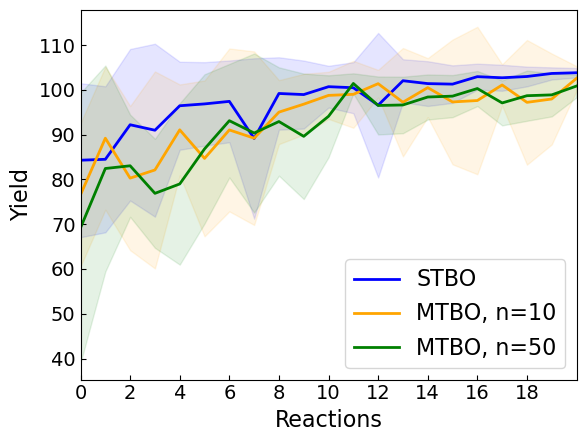

In [36]:
benzamide.plot_figure('aniline')
benzamide.plot_figure('phenethylamine')
benzamide.plot_figure('morpholine')

### phenethylamine

In [38]:
phenethylamine = Nucleophile('phenethylamine', phenethylamine_bm)

In [47]:
phenethylamine.random_strategy()
phenethylamine.STBO_strategy()

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  war

In [48]:
phenethylamine.MTBO_strategy(aniline_ds, 'aniline', 10)
phenethylamine.MTBO_strategy(benzamide_ds, 'benzamide', 10)
phenethylamine.MTBO_strategy(morpholine_ds, 'morpholine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [49]:
phenethylamine.MTBO_strategy(aniline_ds, 'aniline', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [50]:
phenethylamine.MTBO_strategy(benzamide_ds, 'benzamide', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [51]:
phenethylamine.MTBO_strategy(morpholine_ds, 'morpholine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

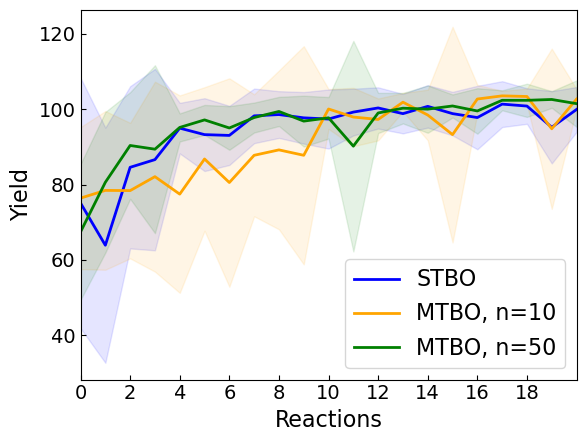

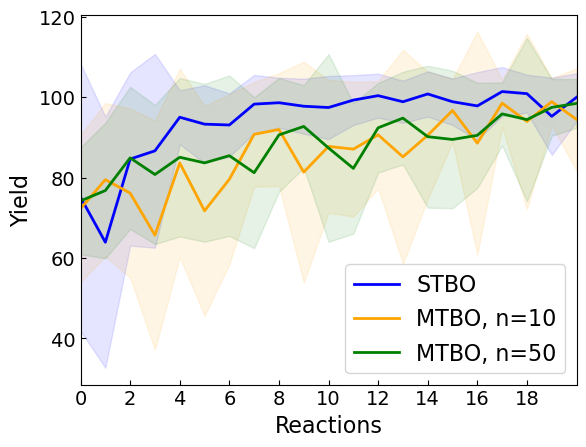

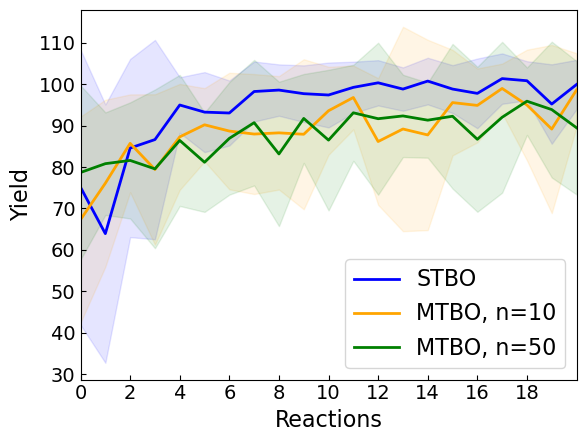

In [39]:
phenethylamine.plot_figure('aniline')
phenethylamine.plot_figure('benzamide')
phenethylamine.plot_figure('morpholine')

### Morpholine

In [40]:
morpholine = Nucleophile('morpholine', morpholine_bm)

In [53]:
morpholine.random_strategy()
morpholine.STBO_strategy()

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  war

In [54]:
morpholine.MTBO_strategy(aniline_ds, 'aniline', 10)
morpholine.MTBO_strategy(benzamide_ds, 'benzamide', 10)
morpholine.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 10)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [55]:
morpholine.MTBO_strategy(aniline_ds, 'aniline', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [56]:
morpholine.MTBO_strategy(benzamide_ds, 'benzamide', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

In [57]:
morpholine.MTBO_strategy(phenethylamine_ds, 'phenethylamine', 50)

Repeat 9


/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:162: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new_ds.drop(variable.name, axis=1)
/Users/dsw46/opt/anaconda3/envs/chemistry/lib/python3.10/site-packages/summit/strategies/base.py:334: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_ds = new

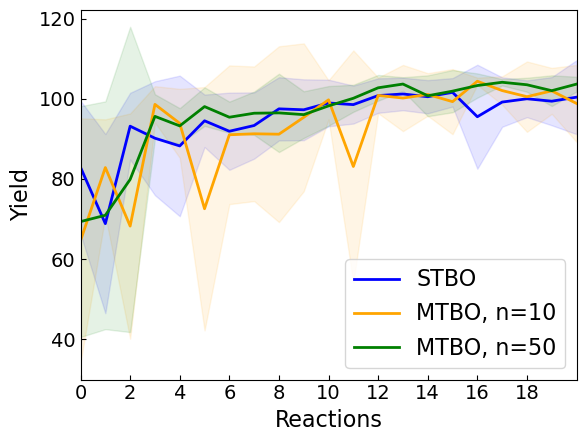

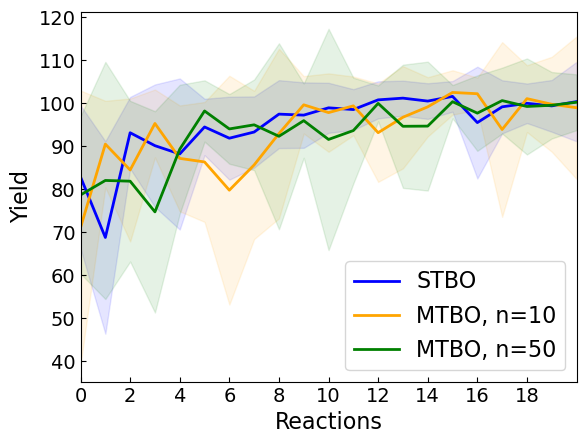

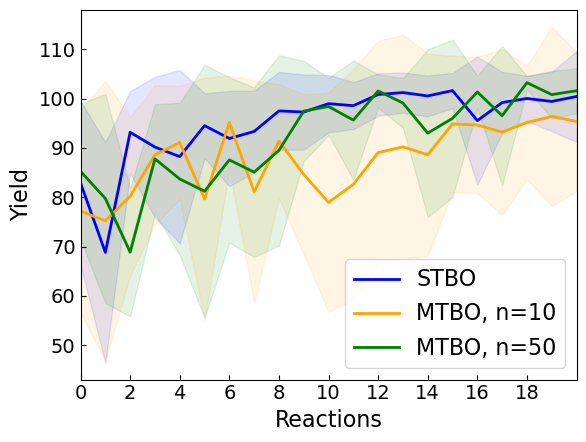

In [41]:
morpholine.plot_figure('aniline')
morpholine.plot_figure('benzamide')
morpholine.plot_figure('phenethylamine')